In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def plot_error(h, error, title):
    plt.figure(figsize=(15, 15))
    n = len(h)
    
    for i in range(n):
        plt.subplot(3, 2, i + 1)    
        plt.plot(h[i], error[i], 'g.-')
        plt.ylabel(title[i])
        plt.grid()
    
    plt.show()

In [12]:
def generate_steps(min_value, max_value, steps_count):
    return np.linspace(min_value, max_value, steps_count)

In [13]:
def my_derivative(func, x, h, alpha):
    return (func(x + h / alpha) - func(x - h / alpha)) / (2 * h)

In [14]:
alpha_min = 1
alpha_max = 2
alpha_count = 6

h_min = 0.00000001
h_max = 1
h_count = 500

x_0 = 1

In [17]:
alpha_all = generate_steps(alpha_min, alpha_max, alpha_count)

title_all = ["alpha = " + str(alpha) for alpha in alpha_all]

h_all = [alpha * generate_steps(h_min, h_max, h_count) for alpha in alpha_all]
    
error_all = [[math.cos(x_0) - my_derivative(math.sin, 
                                            x_0, 
                                            h_all[alpha_index][h_index], 
                                            alpha_all[alpha_index]) for h_index in range(h_count)] 
             for alpha_index in range(alpha_count)]

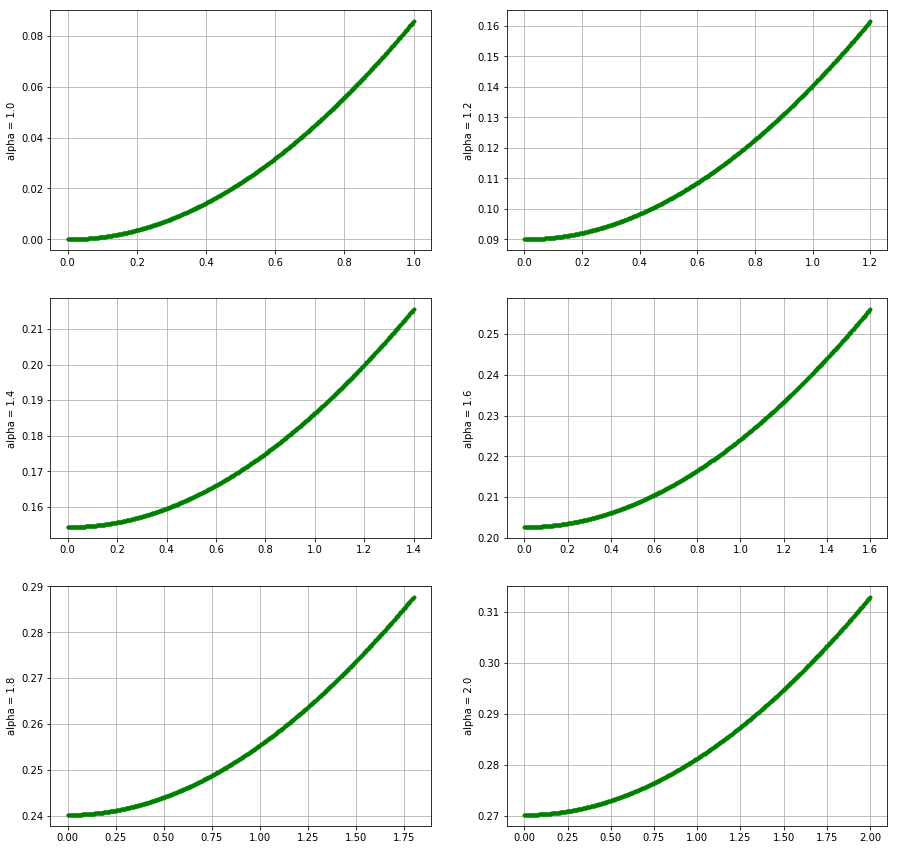

In [16]:
plot_error(h_all, error_all, title_all)